## This notebook produces colored map neasr the floor level

In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import scipy


In [3]:
df1 = pd.read_csv('Mapping_0809_RUN1.csv')
df2 = pd.read_csv('Mapping_0809_RUN2.csv')
df3 = pd.read_csv('Mapping_0809_RUN3.csv')
df4 = pd.read_csv('Mapping_0809_RUN4.csv')

df_all0 = df1.append(df2)
df_all1  = df_all0.append(df3)
df_all  = df_all1.append(df4)


In [4]:
u_max = np.max(df_all.u)
v_max = np.max(df_all.v)
w_max = np.max(df_all.w)
u_min = np.min(df_all.u)
v_min = np.min(df_all.v)
w_min = np.min(df_all.w)

In [5]:
v_floors = df_all1.v.unique()

v_all = df_all.v.unique()
w_all = df_all.w.unique()
u_all = df_all.u.unique()
print len(v_all)
print len(u_all)
print len(w_all)
print u_all
print v_all
print w_all


11
10
14
[-87.95 -47.95  -7.95  32.05  72.05 112.05 152.05  12.05 -27.95 -67.95]
[-146.13 -106.13  -66.13  -26.13   13.87  -46.13   42.37   82.37  122.37
  162.37  202.37]
[-192.75 -152.75 -112.75  -72.75  -32.75    7.25   47.25   87.25  127.25
  167.25  207.25  247.25  287.25  327.25]


#### flat 2D density 


#### Horizontal cuts


In [6]:
# v_cut = v_floors[6]
idx_cut = 0
v_cut=v_all[idx_cut]

df_all_sub = df_all[df_all.v==v_cut]
print df_all_sub.index.size
u_min, u_max= np.min(df_all_sub.u), np.max(df_all_sub.u)
w_min, w_max= np.min(df_all_sub.w), np.max(df_all_sub.w)
NL = 100 # default os 50

u_dense, w_dense = np.meshgrid(np.linspace(u_min, u_max, NL), np.linspace(w_min,w_max, NL))


import scipy.interpolate as interp
Bu_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_u, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bu_dense = Bu_rbf(u_dense, w_dense)  # not really a function, but a callable class instance

Bv_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_v, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bv_dense = Bv_rbf(u_dense, w_dense)  # not really a function, but a callable class instance

Bw_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_w, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bw_dense = Bw_rbf(u_dense, w_dense)  # not really a function, but a callable class instance



92


In [7]:
# df_all_sub[['u','w', 'B_u','B_v','B_w']]
print u_max    
print u_min
print w_min
print w_max
ax1.xaxis.set_ticks?

152.05
-87.95
-192.75
327.25
Object `ax1.xaxis.set_ticks` not found.


<IPython.core.display.Javascript object>


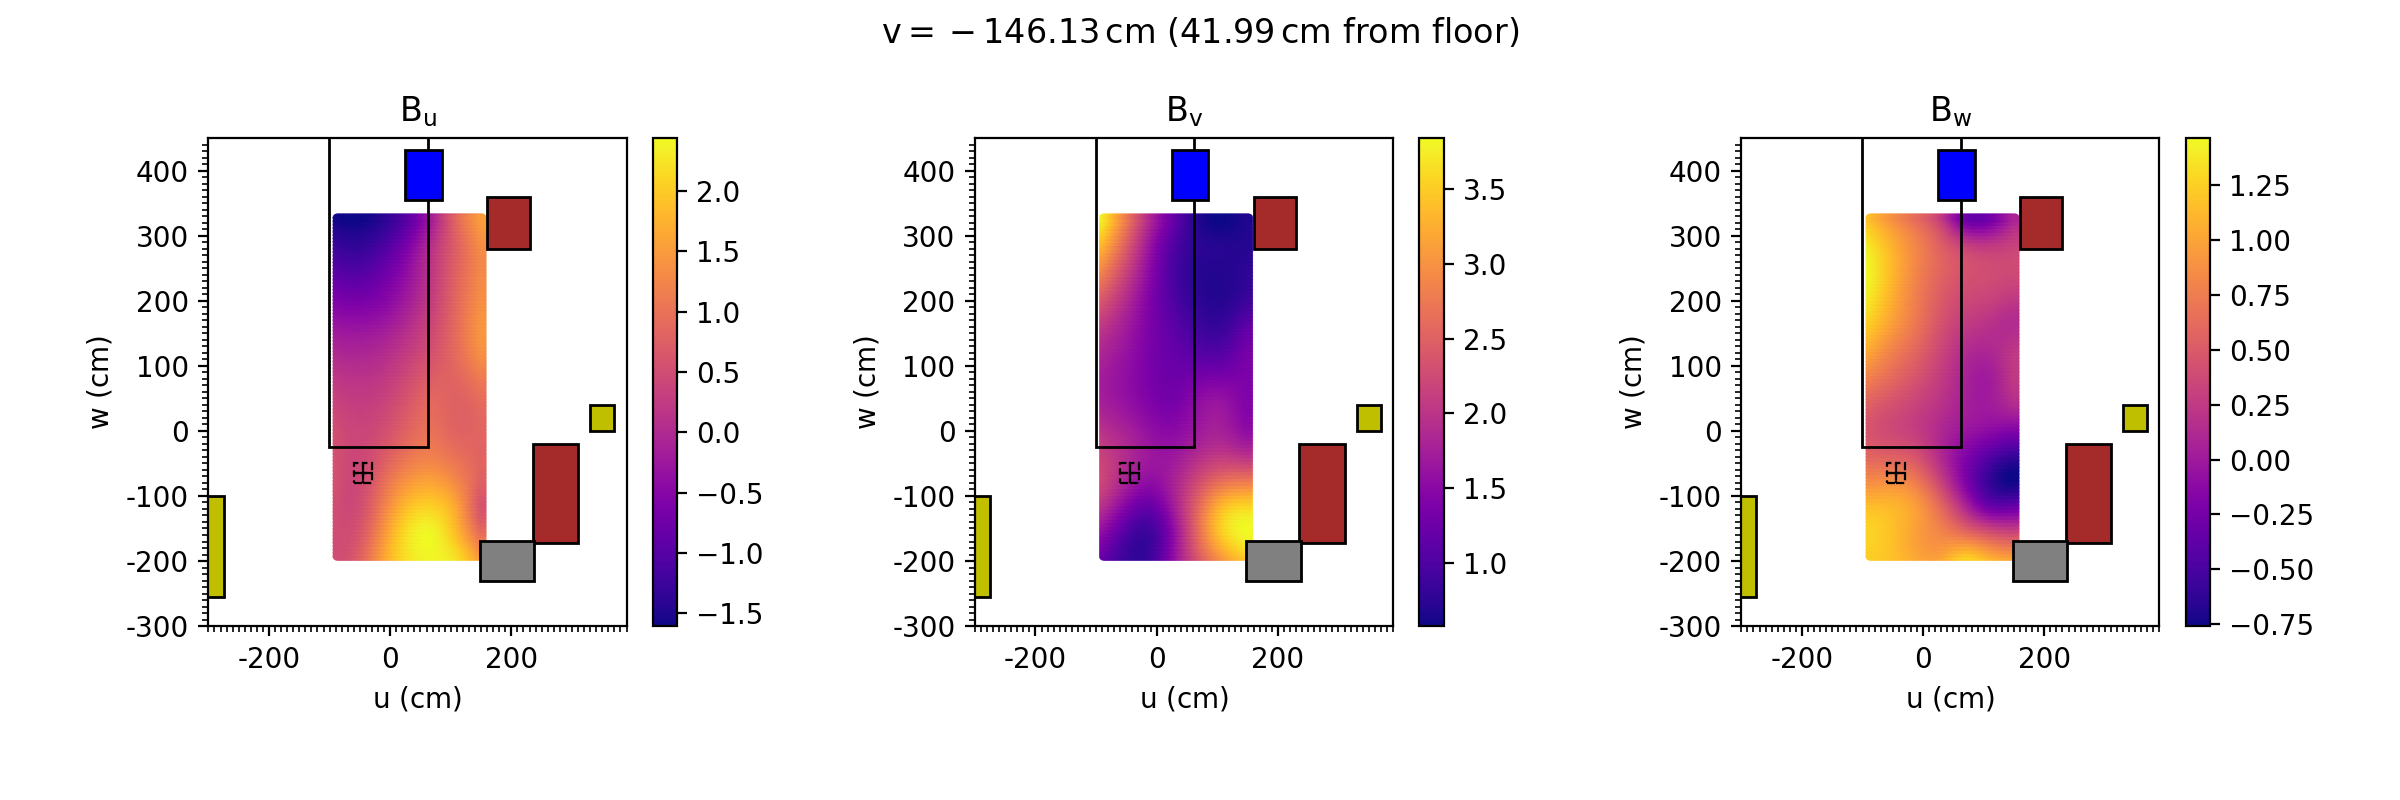

In [33]:
# fig1 = plt.figure(facecolor='white', figsize=(10,5))
fig1 = plt.figure(facecolor='white', figsize=(12,4))
ax1 = fig1.add_subplot(131)
ax2 = fig1.add_subplot(132)
ax3 = fig1.add_subplot(133)


# ax1.tick_params(axis='x', rotation=-15, labelsize=10)
# ax1.tick_params(axis='y', rotation=-25, labelsize=10)
# ax1.tick_params(axis='y', rotation=-30, labelsize=11)
# ax1.set_ylim3d(np.min(df1_sub.v)-15,np.max(df1_sub.v)+5)



for axi in [ax1, ax2, ax3]:    
#     axi.set_xlim(u_min,u_max)
#     axi.set_ylim(w_min,w_max)    
    axi.set_xlim(-300,300)
    axi.set_ylim(-220,450)    


    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.xaxis.set_ticks(np.arange(-300, 400, 10), minor=True)      
    axi.yaxis.set_ticks(np.arange(-300, 450, 10), minor=True)      

    axi.set_xlabel('$\mathsf{u}$ (cm)')
    axi.set_ylabel('$\mathsf{w}$ (cm)')
    


# sc1 = ax1.scatter(df1_sub.w, df1_sub.v, df1_sub.B_u,c=df1_sub.B_u, edgecolor='',marker='o', cmap=cm.plasma)
sc1_int = ax1.scatter(u_dense, w_dense,  c=Bu_dense, marker='.', lw=.1, cmap=cm.plasma)
sc2_int = ax2.scatter(u_dense, w_dense, c=Bv_dense, marker='.', lw=.1, cmap=cm.plasma)
sc3_int = ax3.scatter(u_dense, w_dense,  c=Bw_dense, marker='.', lw=.1, cmap=cm.plasma)



cb1 = plt.colorbar(sc1_int, ax=ax1)
cb2 = plt.colorbar(sc2_int, ax=ax2)
cb3 = plt.colorbar(sc3_int, ax=ax3)



# grids representing the rebars 

import matplotlib.patches as patches

for axi in [ax1, ax2, ax3]:
    rect0 = patches.Rectangle((-60,-80),15.24,15.24,linewidth=.8,ls='--', edgecolor='black',facecolor='none')
    rect1 = patches.Rectangle((15.24-60,-80),15.24,15.24,linewidth=.8,ls='--', edgecolor='black',facecolor='none')
    rect2 = patches.Rectangle((-60,15.24-80),15.24,15.24,linewidth=.8,ls='--', edgecolor='black',facecolor='none')
    rect3 = patches.Rectangle((15.24-60,15.24-80),15.24,15.24,linewidth=.8,ls='--', edgecolor='black',facecolor='none')

    box_DAQ = patches.Rectangle((25, 355), 60, 76,  edgecolor='black', facecolor='blue')
    box_tool = patches.Rectangle((148, -169-62), 90, 62,  edgecolor='black', facecolor='gray')

    box_tool2 = patches.Rectangle((-275-46, -100-155), 46, 155,  edgecolor='black', facecolor='y')

    box_tab1 = patches.Rectangle((160, 360-80), 70, 80,  edgecolor='black', facecolor='brown')
    box_tab2 = patches.Rectangle((235, -20-153), 75, 153,  edgecolor='black', facecolor='brown')

    box_SCM = patches.Rectangle((330,40-40),40,40,edgecolor='black', facecolor='y')


    # rect_p = patches.Rectangle((-800, 320),  80, 140, edgecolor='black',facecolor='none')

    rect_p = patches.Rectangle((62.1-162.7, -24.2),  162.7, 516.06, edgecolor='black',facecolor='none')
    # Add the patch to the Axes
#     ax1.add_patch(rect0)
#     ax1.add_patch(rect1)
#     ax1.add_patch(rect2)
#     ax1.add_patch(rect_p)
#     ax1.add_patch(box_DAQ)
#     ax1.add_patch(box_tab1)
#     ax1.add_patch(box_tab2)

#     ax1.add_patch(box_tool)

#     ax1.add_patch(box_tool2)
#     # ax1.add_patch(box_tool3)
#     # ax1.add_patch(box_tool4)
#     ax1.add_patch(box_SCM)

    axi.add_patch(rect0)
    axi.add_patch(rect1)
    axi.add_patch(rect2)
    axi.add_patch(rect3)
    axi.add_patch(rect_p)
    axi.add_patch(box_DAQ)
    axi.add_patch(box_tab1)
    axi.add_patch(box_tab2)

    axi.add_patch(box_tool)

    axi.add_patch(box_tool2)
    # ax1.add_patch(box_tool3)
    # ax1.add_patch(box_tool4)
    axi.add_patch(box_SCM)


# np.linspace()

ax1.set_title('$\mathsf{B_u}$') 
ax2.set_title('$\mathsf{B_v}$')
ax3.set_title('$\mathsf{B_w}$')

fig1.suptitle('$\mathsf{v=%.2f\,cm\,\, (%.2f\,cm\,\,from\,\,floor  )}$'%(v_cut,v_cut+188.12))

fig1.tight_layout(pad=3,rect=[0, 0, 1, 0.99])

fig1.savefig('plots_floor_2D_color/Mapping0809_v_id_%02d%.2f_map.png' %(idx_cut,v_cut))

In [272]:
# v_cut = v_floors[6]
idx_cut = 11
v_cut=v_all[idx_cut]

df_all_sub = df_all[df_all.v==v_cut]
print df_all_sub.index.size
u_min, u_max= np.min(df_all_sub.u), np.max(df_all_sub.u)
w_min, w_max= np.min(df_all_sub.w), np.max(df_all_sub.w)
NL = 100 # default os 50

u_dense, w_dense = np.meshgrid(np.linspace(u_min, u_max, NL), np.linspace(w_min,w_max, NL))


import scipy.interpolate as interp
Bu_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_u, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bu_dense = Bu_rbf(u_dense, w_dense)  # not really a function, but a callable class instance

Bv_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_v, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bv_dense = Bv_rbf(u_dense, w_dense)  # not really a function, but a callable class instance

Bw_rbf = interp.Rbf(df_all_sub.u, df_all_sub.w, df_all_sub.B_w, function='cubic', smooth=0)  # default smooth=0 for interpolation
Bw_dense = Bw_rbf(u_dense, w_dense)  # not really a function, but a callable class instance


fig1 = plt.figure(facecolor='white', figsize=(10,5))
# fig1 = plt.figure(facecolor='white', figsize=(12,4))
ax1 = fig1.add_subplot(131)
ax2 = fig1.add_subplot(132)
ax3 = fig1.add_subplot(133)


# ax1.tick_params(axis='x', rotation=-15, labelsize=10)
# ax1.tick_params(axis='y', rotation=-25, labelsize=10)
# ax1.tick_params(axis='y', rotation=-30, labelsize=11)
# ax1.set_ylim3d(np.min(df1_sub.v)-15,np.max(df1_sub.v)+5)



for axi in [ax1, ax2, ax3]:    
#     axi.set_xlim(-300,300)
#     axi.set_ylim(-220,400)    


    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    axi.xaxis.set_ticks(np.arange(-90, 200, 10), minor=True)      
    axi.yaxis.set_ticks(np.arange(-200, 320, 10), minor=True)      
    axi.set_xlim(u_min,u_max)
    axi.set_ylim(w_min,w_max)    

    axi.set_xlabel('$\mathsf{u}$ (cm)')
    axi.set_ylabel('$\mathsf{w}$ (cm)')
    


# sc1 = ax1.scatter(df1_sub.w, df1_sub.v, df1_sub.B_u,c=df1_sub.B_u, edgecolor='',marker='o', cmap=cm.plasma)
sc1_int = ax1.scatter(u_dense, w_dense,  c=Bu_dense, marker='.', lw=.1, cmap=cm.plasma)
sc2_int = ax2.scatter(u_dense, w_dense, c=Bv_dense, marker='.', lw=.1, cmap=cm.plasma)
sc3_int = ax3.scatter(u_dense, w_dense,  c=Bw_dense, marker='.', lw=.1, cmap=cm.plasma)



cb1 = plt.colorbar(sc1_int, ax=ax1)
cb2 = plt.colorbar(sc2_int, ax=ax2)
cb3 = plt.colorbar(sc3_int, ax=ax3)



# grids representing the rebars 

import matplotlib.patches as patches

rect0 = patches.Rectangle((-60,-80),15.24,15.24,linewidth=.8,ls='--', edgecolor='black',facecolor='none')
rect1 = patches.Rectangle((15.24-60,-80),15.24,15.24,linewidth=.8,ls='--', edgecolor='black',facecolor='none')
rect2 = patches.Rectangle((-60,15.24-80),15.24,15.24,linewidth=.8,ls='--', edgecolor='black',facecolor='none')

box_DAQ = patches.Rectangle((80, 360), 40, 80,  edgecolor='black', facecolor='blue')
box_tool = patches.Rectangle((160, -220), 90, 60,  edgecolor='black', facecolor='gray')
box_tool1 = patches.Rectangle((-400, -40), 50, 100,  edgecolor='black', facecolor='gray')

box_tool2 = patches.Rectangle((-210, -150), 35, 50,  edgecolor='black', facecolor='y')
box_tool3 = patches.Rectangle((-280, -275), 90, 100,  edgecolor='black', facecolor='gray')
box_tool4 = patches.Rectangle((-400, -40), 50, 100,  edgecolor='black', facecolor='gray')
box_tab = patches.Rectangle((260, 100), 40, 260,  edgecolor='black', facecolor='brown')

box_SCM = patches.Rectangle((330,40),40,40,edgecolor='black', facecolor='y')


# rect_p = patches.Rectangle((-800, 320),  80, 140, edgecolor='black',facecolor='none')

rect_p = patches.Rectangle((62.1-162.7, -24.2),  162.7, 516.06, edgecolor='black',facecolor='none')
# Add the patch to the Axes
# ax1.add_patch(rect0)
# ax1.add_patch(rect1)
# ax1.add_patch(rect2)
# ax1.add_patch(rect_p)
# ax1.add_patch(box_DAQ)
# ax1.add_patch(box_tab)
# ax1.add_patch(box_tool)
# ax1.add_patch(box_tool1)
# ax1.add_patch(box_tool2)
# ax1.add_patch(box_tool3)
# ax1.add_patch(box_tool4)
# ax1.add_patch(box_SCM)



# np.linspace()

ax1.set_title('$\mathsf{B_u}$') 
ax2.set_title('$\mathsf{B_v}$')
ax3.set_title('$\mathsf{B_w}$')

fig1.suptitle('$\mathsf{v=%.2f\,cm\,\, (%.2f\,cm\,\,from\,\,floor  )}$'%(v_cut,v_cut+188.12))

fig1.tight_layout(pad=3,rect=[0, 0, 1, 0.99])

fig1.savefig('plots_floor_2D_color/Mapping0809_v_id_%02d%.2f.png' %(idx_cut,v_cut))

IndexError: index 11 is out of bounds for axis 0 with size 11